In [2]:
import pandas as pd
%matplotlib inline
import glob
import os
#import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from pylab import rcParams
import matplotlib.patches as patches

import qgrid

In [3]:
well_log_file = "G:/My Drive/WORK/Round_Valley/Data/Well_Logs/"
data_source = well_log_file + "Records.xlsx"
well_activities = well_log_file + 'all_well_activities.txt'

# Drilling Date

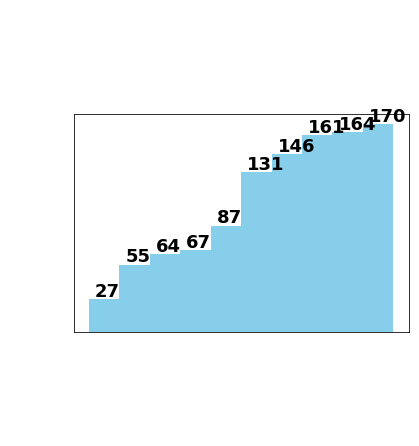

In [5]:
well_act = pd.read_csv(well_activities)
well_act = well_act[well_act['activityType']=='New']

construction = pd.read_excel(data_source,'Construction')

rcParams['font.size'] = 18
rcParams['font.weight'] = 'bold'
rcParams['xtick.color'] = 'white'
rcParams['ytick.color'] = 'white'
rcParams['axes.labelcolor'] = 'white'
rcParams['axes.labelweight'] = 'bold'
rcParams['text.color']= 'black'

def getwin(x):
    if '{:0.0f}'.format(x) == 'nan':
        pass
    else:
        return '{:0.0f}'.format(x)

winlist = list(set(construction['WIN'].apply(lambda x: getwin(x),1).unique()))
wins = []
for i in winlist:
    if i != None: 
        wins.append(int(i))
well_act = well_act[(well_act.win.isin(wins))&(pd.notnull(well_act.ACTIV_COM_DATE))]

well_act['year'] = well_act.ACTIV_COM_DATE.apply(lambda x: int(str(x)[:4]),1)

#well_act = well_act[well_act.year>=1970]

bns = []
for j in range(1970,2025,5):
    bns.append(j)

n, bins, patches = plt.hist(well_act['year'],cumulative=True,color='skyblue',bins=bns)
for i in range(len(n)):
    plt.text(bins[i]+1, n[i]+2, "{:0.0f}".format(n[i]),horizontalalignment='left')
plt.xticks(range(1970,2020,5))
plt.ylabel('Total number of wells recorded since 1970')
plt.xlabel('Year')

well_act['drilldate'] = well_act.ACTIV_COM_DATE.apply(lambda x: pd.to_datetime(str(x),format='%Y%M%D',errors='coerce'),1)
well_act.sort_values(['drilldate'],inplace=True)
well_act['ones'] = 1
well_act['num_wells'] = well_act['ones'].cumsum()
well_act.set_index(['drilldate'],inplace=True)
plt.savefig('G:/My Drive/WORK/Round_Valley/Writing/Figures/well_count.pdf')

In [6]:
qgrid_widget = qgrid.QgridWidget(df=well_act, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, precision=5, show_toolbar=True)

# Depth

In [19]:
screen_depth = pd.read_excel(data_source,'Screen')
dtw = pd.read_excel(data_source,'DTW')
casing = pd.read_excel(data_source,'Casing')
depth = pd.read_excel(data_source,'Sheet8')
depth = depth[(pd.notnull(depth['depth']))]


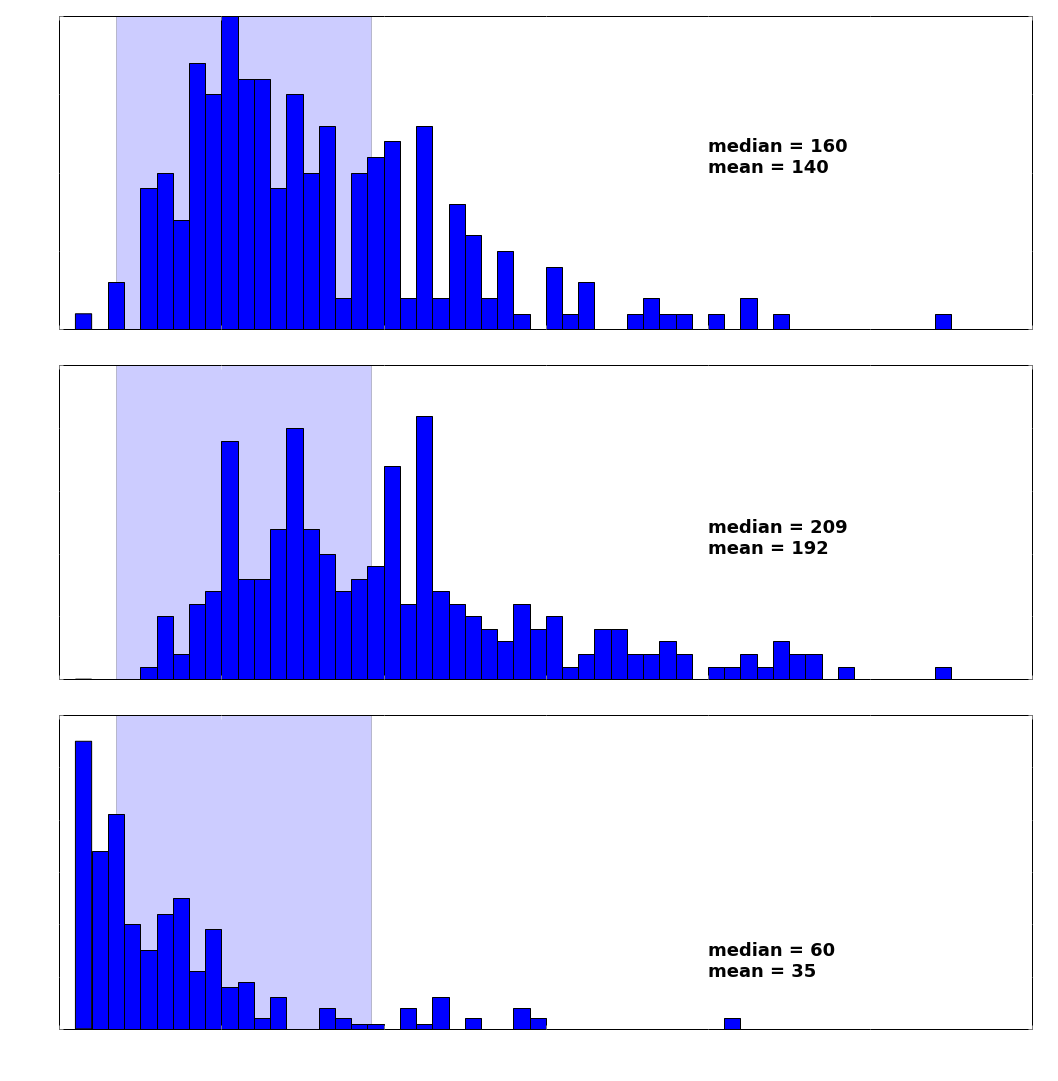

In [36]:

rcParams['font.size'] = 18
rcParams['font.weight'] = 'bold'
rcParams['xtick.color'] = 'white'
rcParams['ytick.color'] = 'white'
rcParams['axes.labelcolor'] = 'white'
rcParams['axes.labelweight'] = 'bold'
rcParams['text.color']= 'black'

bns = range(10,600,10)

ax1 = plt.subplot(311)
ax1.hist(screen_depth['From_ft'],bins=bns)
ax1.set_ylabel('Screen Top Count')
ax1.text(400,10,"median = {:0.0f}\nmean = {:0.0f}".format(screen_depth['From_ft'].mean(),
                                                          screen_depth['From_ft'].median()))

ax2 = plt.subplot(312,sharex=ax1)
ax2.hist(screen_depth['To_ft'],bins=bns)
ax2.text(400,10,"median = {:0.0f}\nmean = {:0.0f}".format(screen_depth['To_ft'].mean(),
                                                          screen_depth['To_ft'].median()))
ax2.set_ylabel('Screen Bottom Count')
#ax2.set_xlabel(None)
ax3 = plt.subplot(313,sharex=ax1)
ax3.hist(dtw['DTW'],bins=bns)
ax3.text(400,10,"median = {:0.0f}\nmean = {:0.0f}".format(dtw['DTW'].mean(),
                                                          dtw['DTW'].median()))
ax3.set_ylabel('Depth to Water Count')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax1.add_patch(patches.Rectangle((dtw['DTW'].median(),0),screen_depth['To_ft'].median()-dtw['DTW'].median(),
                                25,alpha=0.2,zorder=0)) 
ax2.add_patch(patches.Rectangle((dtw['DTW'].median(),0),screen_depth['To_ft'].median()-dtw['DTW'].median(),
                                25,alpha=0.2,zorder=0)) 
ax3.add_patch(patches.Rectangle((dtw['DTW'].median(),0),screen_depth['To_ft'].median()-dtw['DTW'].median(),
                                60,alpha=0.2,zorder=0)) 

plt.tight_layout(True)
plt.xlabel('Depth (ft)')
plt.savefig('E:/Google Drive/WORK/Round_Valley/Writing/Figures/depth_Stats.pdf')